<a href="https://colab.research.google.com/github/RithikRajD/EDA-Capstone-Project-1-on-Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### ***First we start with importing all libraries which we need in future use.***

In [1]:
# importing numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***Mount the drive and import the datasheet***

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the csv file
file_path='/content/drive/MyDrive/Colab Notebooks/PRoject/Copy of Airbnb NYC 2019.csv'
airbnb_nyc_df = pd.read_csv(file_path)

### ***Now we check the dataset that is uploded using pd.read_csv. And obtain the information of the dataset using .info().***

In [4]:
# checking the dataframe
airbnb_nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb_nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

***Summary of the columns:***
  
- 'id' = It is the special id assigned to listings.

- 'name' = It is a column that lists the descriptions and names of the listings given by the various hosts for the benefit of their clients.

- 'host id' and 'host name' = Many hosts are offering a wide variety of properties. All of those hosts' records are stored in this "host id" and "host name" field.

- 'neighborhood_group' and 'neighborhood' = These columns contain details about the locales of the houses that airbnb in New York is offering.

- 'latitude' and 'Longitude' = As implied by the name, it just includes the latitude and longitude of the property's location.

- 'room_type' = It shows the property's room type, which can be either a private room, a complete home, or a shared room.

- 'price' = It's a significant column that contains the cost of each of those properties in the listings.

- 'minimum_nights' = It informs us of the minimum number of nights that the host will provide the specific property.

- 'last_review' = It tells us about when was the last review been given for a particular listing.

- 'reviews_per_month' and "number_of_reviews" = It includes details on the amount and frequency of reviews for particular accommodations and hosts(It includes total number of reviews as well as monthly reviews for a perticular property).

- 'availability_365' = It provides details about the listings' accessibility around the year i.e., how many days the listing is available in a year.





###**Treating Null values**

**5) From the .info() method we can see that some columns have null values(NaN). So we need check no of null values in given columns and take care of the null values.**

In [6]:
airbnb_nyc_df.shape

(48895, 16)

In [7]:
# checking for null values in al the columns
airbnb_nyc_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# cheching host_id's of null values
airbnb_nyc_df[airbnb_nyc_df['host_name'].isna()]['host_id']

360         526653
2700       7779204
5745        919218
6075      23077718
6582      24576978
8163      32722063
8257      33134899
8852      32722063
9138       5162530
9817      39608626
14040      7822683
14631     26138712
15174      5300585
19565    100971588
27777       415290
27962    159156636
28042    159156636
28274    159156636
30570    177146433
32193    119609345
38992    228750026
Name: host_id, dtype: int64

In [9]:
# checking the count of host_id's with null values 
airbnb_nyc_df[airbnb_nyc_df['host_name'].isna()]['host_id'].value_counts()

159156636    3
32722063     2
526653       1
26138712     1
119609345    1
177146433    1
415290       1
100971588    1
5300585      1
7822683      1
7779204      1
39608626     1
5162530      1
33134899     1
24576978     1
23077718     1
919218       1
228750026    1
Name: host_id, dtype: int64

In [10]:
# checking if there are any host_id's which have names to it
z= airbnb_nyc_df[airbnb_nyc_df['host_name'].isna()]['host_id'].value_counts().reset_index()
for i,j in z.iterrows():
  if j[1]>1:
    print(airbnb_nyc_df[airbnb_nyc_df['host_id']==j[0]]['host_name'])

27962    NaN
28042    NaN
28274    NaN
Name: host_name, dtype: object
8163    NaN
8852    NaN
Name: host_name, dtype: object


In [11]:
# checking whether a host is hosting only one listing or not
airbnb_nyc_df['host_id'].value_counts().head()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [12]:
# checking whether the id is unique for different listings
airbnb_nyc_df['id'].value_counts()

2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64

***Inference from the above analysis:***
- When compared to the total number of records in the dataframe, only a small percentage of the columns named "name" and "host name" are null. However, the columns "last review" and "reviews per month" have glaringly absent information in them.

- Since name and host name both contain unique identifiers, we can disregard the missing values in those columns.

- However, we cannot disregard the other columns. The "last review" field is removed from this table because it is not very useful for our investigation.

- Additionally, we enter 0 for the NaN values in the "reviews per month" column.

- We no longer use "calculated host listings count" because it only provides the host id count.

- In order to avoid using this column in subsequent analysis, we can just count the host ids as needed.

- There is unique id for every unique listing where as many listings can have same host_id. By this we can say that a host can have any number of listings.

- We even saw that the host id's of host names with null values do not repeat elsewhere in the dataset.

***Next Step:***

- Using .fillna() , we can fill the null values in the reviews_per_month column in airbnb_df dataframe.

- Then with the help of .drop() method we can drop the columns last_review, calculated_host_listings_count which are not going to be used in this analysis.

In [13]:
# filling null values in host_name, name and reviews_per_month columns
airbnb_nyc_df['name'].fillna('no_name',inplace =True)
airbnb_nyc_df['host_name'].fillna('unknown',inplace = True)
airbnb_nyc_df['reviews_per_month'].fillna(0,inplace=True)

In [14]:
# droping the last_review and calculated_host_lsitings_count columns
airbnb_nyc_df.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)

- The updated dataframe looks as follows

In [15]:
airbnb_nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


In [16]:
# again checking for null values 
airbnb_nyc_df.isna().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

### ***Using box plot we can check for the outliers in the price column in the airbnb_df dataframe.***

### **Treating outliers**

In [17]:
airbnb_nyc_df['price'].median()

106.0

In [18]:
airbnb_nyc_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

***Inference:***
- From the .describe() method we can infer that although the values of the price are consistent till the 75% mark, the max value has a steep inclination in the value. So we can assume that the price column may have some outliers and the outliers can be visualised through box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


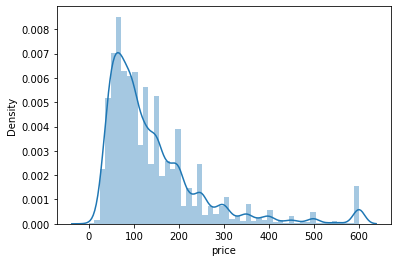

In [77]:
# plotting the distribution plot to check for outliers in price column
sns.distplot(airbnb_nyc_df['price'])
# this is a KDE(kernal distribution Estimation) plot which depicts the probability density function of the continuous or non-parametric data variable

In [20]:
airbnb_nyc_df['price'].kurt()
# this helps us to find the kurtosis of the above plot. A plot is said to be good and free from outliers when the kurtosis is less than 1. 

585.6728788988286

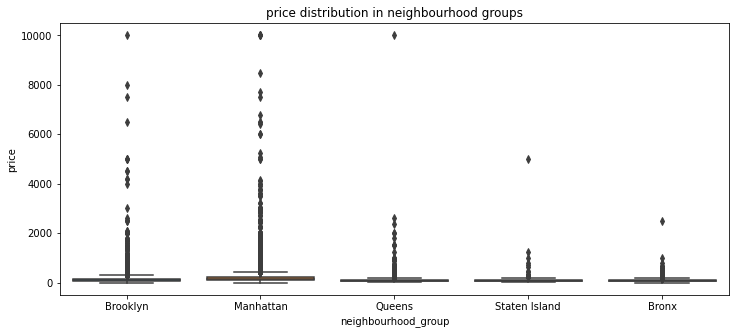

In [21]:
# plotting the boxplot of the price distribution in different neighbourhood groups
plt.figure(figsize=(12,5))
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_nyc_df)
plt.title('price distribution in neighbourhood groups')
plt.show()

In [22]:
# calulating inter quartile range 
airbnb_df1 = airbnb_nyc_df.copy()
q25,q75=np.percentile(airbnb_df1['price'],[25,75])
iqr = q75-q25
iqr

106.0

In [23]:
# checking for the values of the upper and lower limits to get the range of values excepting outliers
upper_limit = q75 + iqr*1.5
lower_limit = q25 - iqr*1.5
if lower_limit >0:
  lower_limit =lower_limit
else:
  lower_limit = 0
print(upper_limit,lower_limit)

334.0 0


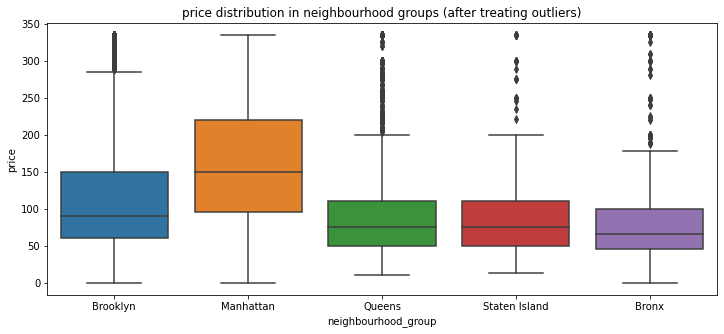

In [24]:
# plotting the box plot with the upper limit as the maximum value
airbnb_df1.loc[airbnb_df1['price']>upper_limit,'price'] = upper_limit
plt.figure(figsize=(12,5))
sns.boxplot(x='neighbourhood_group',y='price',data=airbnb_df1)
plt.title('price distribution in neighbourhood groups (after treating outliers)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


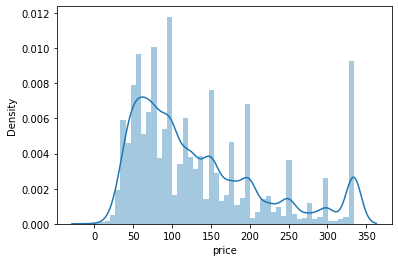

In [79]:
# cheking for ouyliers again
sns.distplot(airbnb_df1['price'])

In [26]:
airbnb_df1['price'].kurt()

0.15710037427136436

In [27]:
#checking number of values greater than 500
airbnb_nyc_df.loc[airbnb_nyc_df['price']>=600,'id'].count()

859

***Inference:***
- As the upper limit is very less and there are many values above the upper limit so instead of completely removing the outliers it is better to reduce the number of outliers.
- The price ranges from 0 to 10,000, however there are a lot of outliers in this distribution. Since we don't want to lose any of the data in our analysis, we will attempt to reduce the outliers rather than eliminate them entirely. We found that there are less than 1000 records with price more than 600. Thus, if the price of property is taken as 600 instead of all the values above 600 , the number of outliers will be reduced.

In [28]:
airbnb_nyc_df.loc[airbnb_nyc_df['price']>=600,'price'] = 600
airbnb_nyc_df[airbnb_nyc_df['price']>=600].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,600,1,25,0.24,7
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,600,5,0,0.00,365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,600,30,30,0.33,0
653,248871,4 BEDROOM -2BATHRM WEST VILLAGE DUPLEX TOWNHOUSE,605463,West Village,Manhattan,West Village,40.73066,-74.00287,Entire home/apt,600,3,131,1.40,296
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,600,3,107,1.15,249


- From the above list of columns we can say that the "price" column has more importance than any other columns because it is the main criterion for this analysis.

***Cleansing of data has been done till now. Let's now analyse the dataset based on different parameters.*** 

## **Analysis of the data:**

## **No.of Listings:**

### **1) With respect to neighbourhood group:**

In [29]:
# number of listings in a neighbourhood group
airbnb_nyc_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'No.of listings in a neighbourhood group')

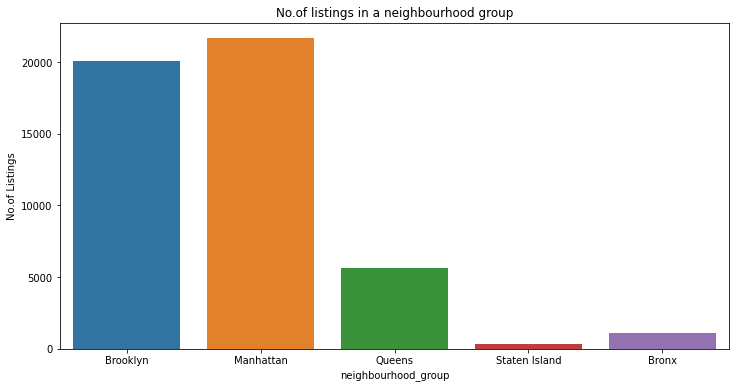

In [30]:
# plotting a graph of neighbourhood group vs number of listings 
plt.figure(figsize=(12,6))
sns.countplot(x='neighbourhood_group',data=airbnb_nyc_df)
plt.xlabel('neighbourhood_group')
plt.ylabel('No.of Listings')
plt.title('No.of listings in a neighbourhood group')

***Inference:***
- It can be said that Brooklyn and Manhattan have highest number of listings where brooklyn is falling short with few listings than Manhattan.

### **2) With respect to room types**

In [31]:
# calculating number of listings of a particular room type 
num_of_rooms = airbnb_nyc_df['room_type'].value_counts(sort = False)
num_of_rooms

Private room       22326
Entire home/apt    25409
Shared room         1160
Name: room_type, dtype: int64

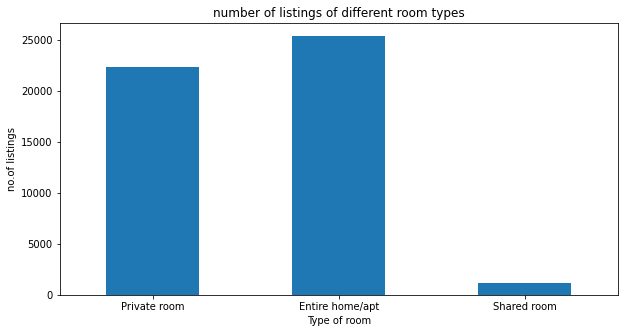

In [32]:
# plotting the room type vs number of listings
plt.figure(figsize=(10,5))
num_of_rooms.plot(kind = 'bar',rot = 0)
plt.xlabel('Type of room')
plt.ylabel('no.of listings')
plt.title('number of listings of different room types')
plt.show()

***Inference:***
- From the above graph , it is clear that private and home/apartment type rooms are of high volume where as shared rooms are very few.

### **3) With respect to room_types in a particular neighbourhood_group:**

In [33]:
# calculating number of lsitings of different room types in particular neighbourhood group
airbnb_nyc_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

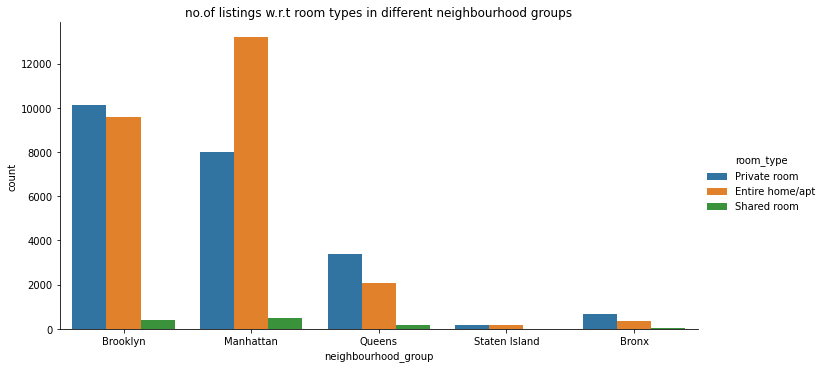

In [34]:
# plotting room types in particular neighbourhood group vs number of lsitings
sns.catplot(x='neighbourhood_group',hue='room_type', data=airbnb_nyc_df,kind ='count', height = 5 , aspect =2)
plt.title('no.of listings w.r.t room types in different neighbourhood groups')
plt.show()

***Inference:***
- The graph shows that the listings with room type as private are high in number in maximum of the neighbourhood groups and second to that is entire home/apartment with somewhat less number of listing than private room types. 
- The shared room types are the least with very few numbers. 
- This conculsion is not true for Manhattan but true for all other neighbourhood groups. For Manhatten the entire home/Apartment room type are very high in numbers when compared to private room types.

## **Top 10 listings, neighbourhood group and hosts:**

### 1) **Top 10 listings based on numbers in NYC:**

In [35]:
# listings with high number of properties 
top_10_listings = airbnb_nyc_df[airbnb_nyc_df['name']!='no_name']['name'].value_counts().sort_values(ascending=False)[:10]
top_10_listings

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Williamsburg                   8
Cozy Brooklyn Apartment                        8
Name: name, dtype: int64

Text(0.5, 1.0, 'Top listings in NYC')

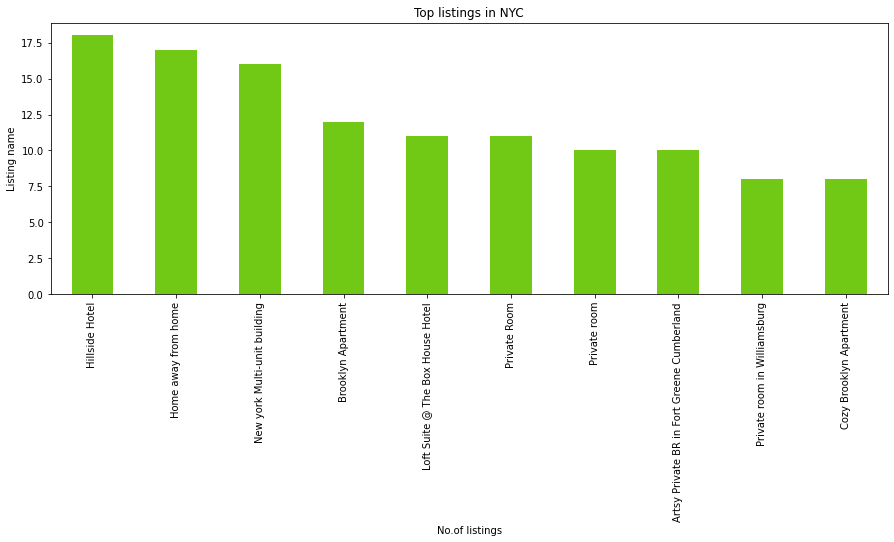

In [36]:
# plotting listing name vs number of properties
plt.figure(figsize=(15,5))
top_10_listings.plot(kind='bar',color = '#72C915' )
plt.xlabel('No.of listings')
plt.ylabel('Listing name')
plt.title('Top listings in NYC')

In [37]:
# neighbourhood group of the top listing
top_10_listings_df = pd.DataFrame(top_10_listings).reset_index()
top_10_listings_df=top_10_listings_df.rename(columns={'index':'name', 'name':'count'})
top_listing = top_10_listings_df.loc[0,'name']
top_listing_nbhg = airbnb_nyc_df[airbnb_nyc_df['name']==top_listing][['neighbourhood_group']]
top_listing_nbhg.iloc[0,0]

'Queens'

In [38]:
# checking whether the top listings are being hosted be same host or not
for i in top_10_listings.index:
  print(airbnb_nyc_df[airbnb_nyc_df['name']==i]['host_id'].value_counts()[0:2])

134184451    18
Name: host_id, dtype: int64
46087238     1
216738370    1
Name: host_id, dtype: int64
221434490    2
7964729      1
Name: host_id, dtype: int64
4425467     1
14512391    1
Name: host_id, dtype: int64
417504    11
Name: host_id, dtype: int64
9490594     1
89855730    1
Name: host_id, dtype: int64
8834412    1
3312204    1
Name: host_id, dtype: int64
230192510    10
Name: host_id, dtype: int64
3285138     1
59609062    1
Name: host_id, dtype: int64
18874199    1
9646150     1
Name: host_id, dtype: int64


### 2) **Top 10 neighbourhoods based on number of listing:**

In [39]:
# neighbourhoods with highest number of listings
top_10_nbh = airbnb_nyc_df['neighbourhood'].value_counts()[:10]
top_10_nbh

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top 10 neighbourhood based on number of listings')

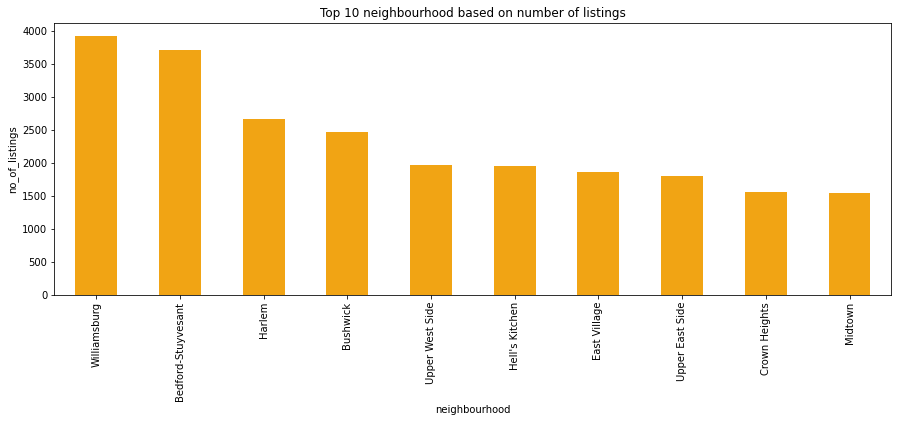

In [40]:
# plotting neighbourhoods vs number of listings
plt.figure(figsize=(15,5))
airbnb_nyc_df['neighbourhood'].value_counts()[:10].plot(kind='bar',color = '#F1A414')
plt.xlabel('neighbourhood')
plt.ylabel('no_of_listings')
plt.title('Top 10 neighbourhood based on number of listings')

In [41]:
# identifying the neighbourhood group of the neighbourhood with highest number of listings
top_10_nbh_df = pd.DataFrame(top_10_nbh).reset_index()
top_10_nbh_df=top_10_nbh_df.rename(columns={'index':'neighbourhood', 'neighbourhood':'count'})
top_nbh = top_10_nbh_df.loc[0,'neighbourhood']
top_nbhg = airbnb_nyc_df[airbnb_nyc_df['neighbourhood']==top_nbh][['neighbourhood_group']]
top_nbhg.iloc[0,0]

'Brooklyn'

###3) **Top 10 hosts based on number of listings:**

In [42]:
# hosts with highest number of listings 
top_10_hosts = airbnb_nyc_df['host_name'].value_counts().sort_values(ascending=False)[:10]
top_10_hosts_df=pd.DataFrame(top_10_hosts)

In [43]:
top_10_hosts_df.reset_index(inplace=True)
top_10_hosts_df.rename(columns={'index':'Host_name','host_name':'No.of Listings'},inplace=True)
top_10_hosts_df

,Host_name,No.of Listings
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


In [44]:
# identifying neighourhood group of host with highest number of listings
top_host = airbnb_nyc_df[['host_id','host_name','neighbourhood_group']][airbnb_nyc_df['host_name']==top_10_hosts_df.loc[0,'Host_name']]
top_host.head(1)

,host_id,host_name,neighbourhood_group
151,62165,Michael,Brooklyn


Text(0.5, 1.0, 'Top hosts in NYC')

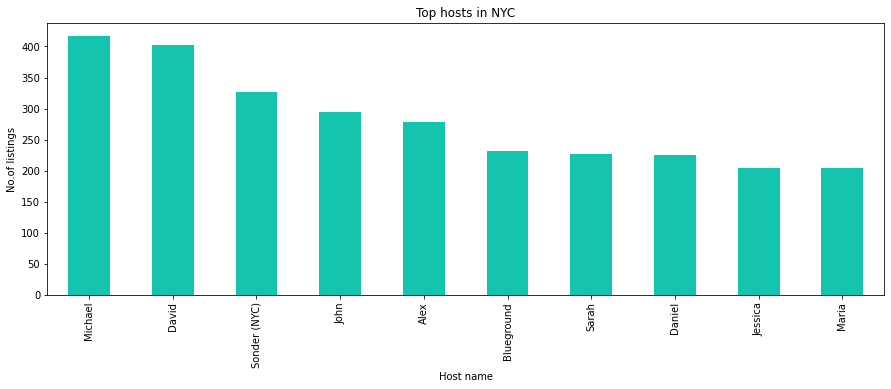

In [45]:
# plotting hosts vs number of listings 
plt.figure(figsize=(15,5))
top_10_hosts.plot(kind='bar',color = '#14C4AF' )
plt.xlabel('Host name')
plt.ylabel('No.of listings')
plt.title('Top hosts in NYC')

In [46]:
# checking whether the top hosts are hosting same listings or different
for i in top_10_hosts.index:
  print(airbnb_nyc_df[airbnb_nyc_df['host_name']==i]['id'].value_counts()[0:2])

36121       1
17457491    1
Name: id, dtype: int64
64015       1
26776816    1
Name: id, dtype: int64
30181691    1
33998142    1
Name: id, dtype: int64
2539        1
25815764    1
Name: id, dtype: int64
47370       1
27869059    1
Name: id, dtype: int64
20845031    1
30394622    1
Name: id, dtype: int64
32331       1
22192285    1
Name: id, dtype: int64
16595       1
26500087    1
Name: id, dtype: int64
26012       1
24959305    1
Name: id, dtype: int64
681805      1
29564676    1
Name: id, dtype: int64


In [47]:
# identifying the number of lisitings of different room types of the top host
airbnb_nyc_df[airbnb_nyc_df['host_name']=='Michael'].groupby('room_type')['room_type'].count()

room_type
Entire home/apt    251
Private room       152
Shared room         14
Name: room_type, dtype: int64

Text(0.5, 1.0, ' no.of listings of room types hosted by top hosts')

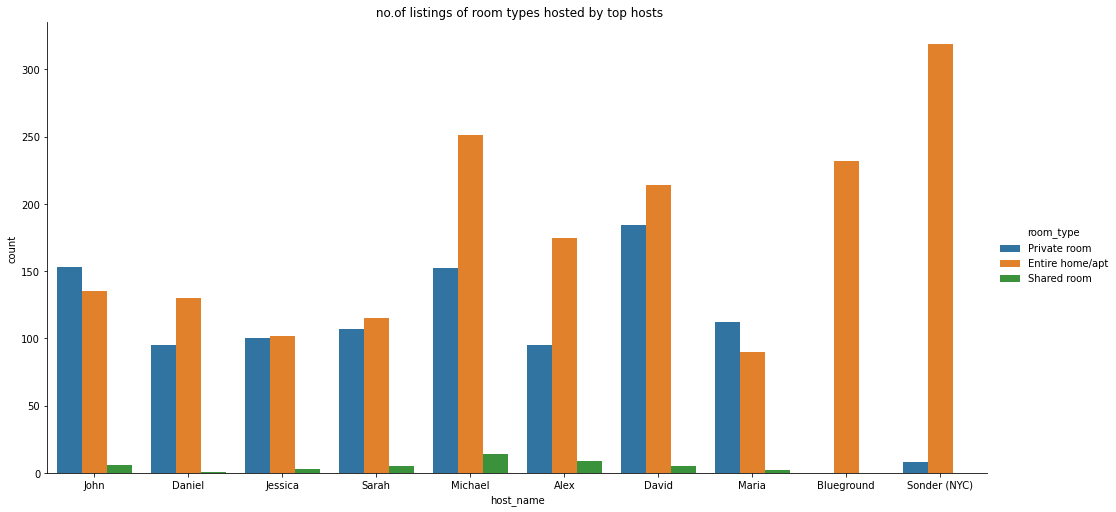

In [48]:
# plotting the listings of different room types of the top 10 hosts 
sns.catplot(x='host_name',hue='room_type', data=airbnb_nyc_df.loc[airbnb_nyc_df['host_name'].isin(top_10_hosts.index)],kind ='count', height = 7 , aspect =2)
plt.title(' no.of listings of room types hosted by top hosts')

***Inference:***
- 'Hillside hotel' has highest number of listing in with 18 and it is located in the neighbourhood group of 'Queens'.
- And all the listings with same name are not being hosted by same hosts.
- 'Williamsburg' has the highest number of listings across NYC and it is located in the neighbourhood group of 'Brooklyn'.
- Michael has highest number of lisitngs hosted in brooklyn. And all the hosts are not hosting same listings.
- the entire home/Apt room types are being hosted more by the top hosts when compared to private or shared room types. And shared room type is negligible when compared to other two.
- Although sonder(NYC) has high number of entire/apt room type listings than michael, michael has very high private room types than sonder(NYC). So Michael is the top host.

## **Correlation between different parameters in the dataset**

 ***Let's use the correlation matrix on different columns such as price , minimum nights, availabilty_365, etc. to see how they are linked with each other.***

In [49]:
# correlation is calculated for different parameters
correlation_of_values = airbnb_nyc_df.corr()
correlation_of_values

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.021060,-0.013224,-0.319760,0.180221,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.030722,-0.017364,-0.140106,0.209783,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.065256,0.024869,-0.015389,-0.018758,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.275505,-0.062747,0.059094,0.138516,0.082731
price,0.021060,0.030722,0.065256,-0.275505,1.000000,0.032672,-0.063484,-0.063409,0.123125
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.032672,1.000000,-0.080116,-0.124905,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.063484,-0.080116,1.000000,0.589407,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.063409,-0.124905,0.589407,1.000000,0.163732
availability_365,0.085468,0.203492,-0.010983,0.082731,0.123125,0.144303,0.172028,0.163732,1.000000


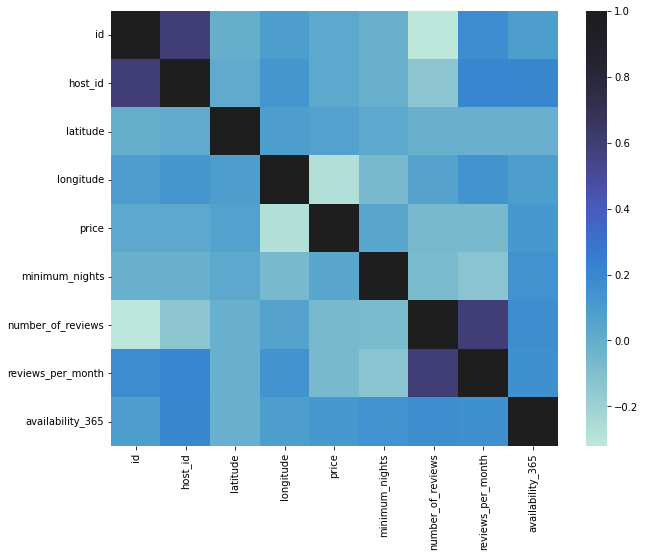

In [50]:
# plotting heatmap to visualize correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_of_values,center = 1);

***Inference:***
- Although there is not much to infer from the correlation of the parameters, as price is the main parameter here, we can see that there is a relation between price and minimum_nights and aailability_365. With this we can further analyse the price column.

##**Average Price of listings:**


###***1) Based on neighbourhood group:***

In [51]:
# calculating the average price of listings in particular neighbourhood group
airbnb_nyc_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             85.067828
Brooklyn         118.076055
Manhattan        178.575227
Queens            95.420755
Staten Island     99.329759
Name: price, dtype: float64

Text(0.5, 1.0, 'average price in neighbourhood groups')

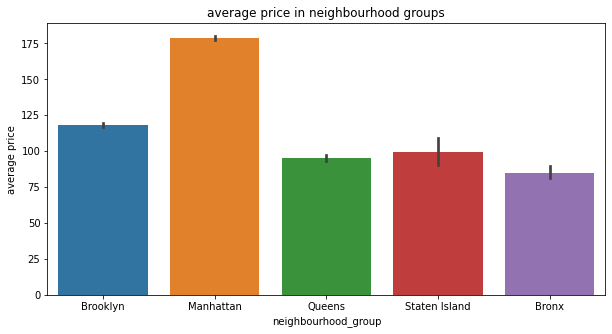

In [52]:
# plotting the neighbourhood group vs average price 
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group',y='price',data=airbnb_nyc_df)
plt.xlabel('neighbourhood_group')
plt.ylabel('average price')
plt.title('average price in neighbourhood groups')

### ***2) Based on room types:***

In [53]:
# calculating the avergae prive of the listings of particular room types
airbnb_nyc_df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    194.211500
Private room        85.090881
Shared room         67.218103
Name: price, dtype: float64

Text(0.5, 1.0, 'average price of different room types')

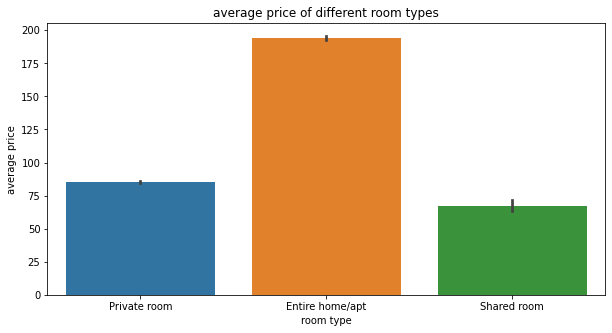

In [54]:
# plotting the listings in particular room type vs average price
plt.figure(figsize=(10,5))
sns.barplot(x='room_type',y='price',data=airbnb_nyc_df)
plt.xlabel('room type')
plt.ylabel('average price')
plt.title('average price of different room types')

### ***3) Based on room types in different neighbourhood group:***

In [55]:
# calcualting the average price of listings of room types in particular neighbourhood group
airbnb_nyc_df.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    126.266491
                     Private room        63.751534
                     Shared room         56.466667
Brooklyn             Entire home/apt    168.437389
                     Private room        73.328563
                     Shared room         50.225182
Manhattan            Entire home/apt    223.726797
                     Private room       109.401027
                     Shared room         87.310417
Queens               Entire home/apt    142.643130
                     Private room        68.285291
                     Shared room         57.656566
Staten Island        Entire home/apt    141.034091
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

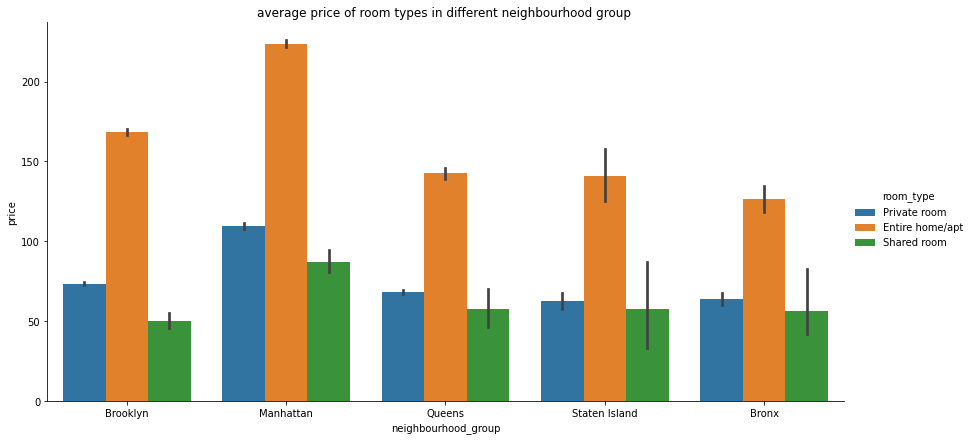

In [56]:
# plotting the average price of listings of room types in particular neighbourhood group
sns.catplot(x='neighbourhood_group',y='price' ,hue='room_type', data=airbnb_nyc_df,kind ='bar', height = 6 , aspect =2)
plt.title('average price of room types in different neighbourhood group ')
plt.show()

### ***4)based on minimum nights:***

In [57]:
# calculating the average minimum number of nights in a particular neighbourhood groups
mn_nbhg_price=airbnb_nyc_df.groupby('neighbourhood_group',as_index = False)['neighbourhood_group','minimum_nights','price'].agg({'minimum_nights':np.mean,'price':np.median})
mn_nbhg_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,neighbourhood_group,minimum_nights,price
0,Bronx,4.560953,65.0
1,Brooklyn,6.056556,90.0
2,Manhattan,8.579151,150.0
3,Queens,5.181433,75.0
4,Staten Island,4.831099,75.0


In [58]:
# calculating the median price in different neighbourhood groups
nbhg_price=airbnb_nyc_df.groupby('neighbourhood_group',as_index =False)['price'].median()
nbhg_price

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


Text(0.5, 1.0, 'relation between median price and minimum nights in neighbourhood groups')

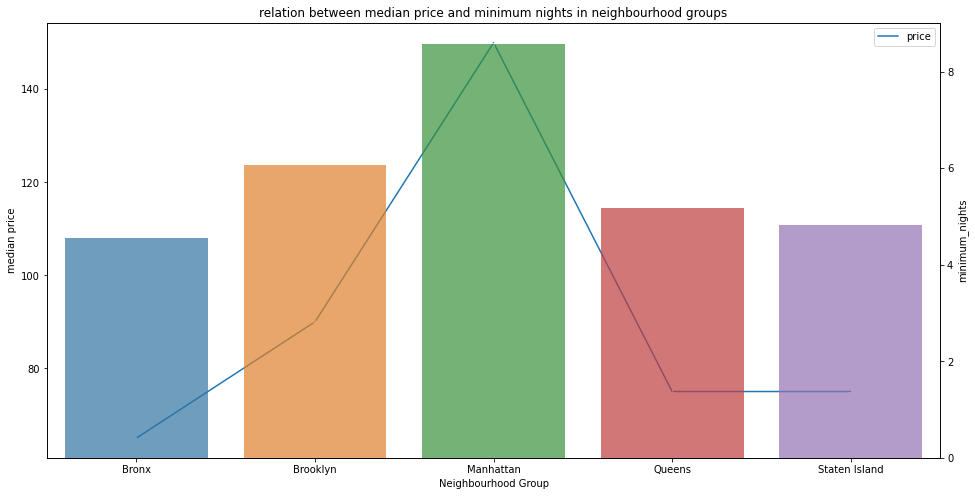

In [59]:
# plotting the relation between the median price and the minimum number of nights in a particular neighbourhood group
fig, ax1 = plt.subplots(figsize=(16,8))

sns.lineplot(data = nbhg_price, marker='+', sort = False, ax=ax1)
plt.xlabel('Neighbourhood Group')
plt.ylabel('median price')
ax2 = ax1.twinx()

sns.barplot(data = mn_nbhg_price, x='neighbourhood_group', y='minimum_nights', alpha=0.7, ax=ax2)
plt.title('relation between median price and minimum nights in neighbourhood groups')


### ***5)based on number of reviews:***

In [60]:
# avergae price of the listings with top number of reviews
top_reviews_price = airbnb_nyc_df.groupby(['number_of_reviews','neighbourhood_group','name'],as_index=False)['price'].agg({'price':np.mean}).sort_values(by='number_of_reviews',ascending = False).reset_index()[:10]
top_reviews_price

,index,number_of_reviews,neighbourhood_group,name,price
0,48691,629,Queens,Room near JFK Queen Bed,47.0
1,48690,607,Manhattan,Great Bedroom in Manhattan,49.0
2,48689,597,Manhattan,Beautiful Bedroom in Manhattan,49.0
3,48688,594,Manhattan,Private Bedroom in Manhattan,49.0
4,48687,576,Queens,Room Near JFK Twin Beds,47.0
5,48686,543,Queens,Steps away from Laguardia airport,46.0
6,48685,540,Manhattan,Manhattan Lux Loft.Like.Love.Lots.Look !,99.0
7,48684,510,Queens,Cozy Room Family Home LGA Airport NO CLEANING FEE,48.0
8,48683,488,Brooklyn,Private brownstone studio Brooklyn,160.0
9,48682,480,Brooklyn,LG Private Room/Family Friendly,60.0


Text(0.5, 1.0, 'top listing prices with high no.of reviwes')

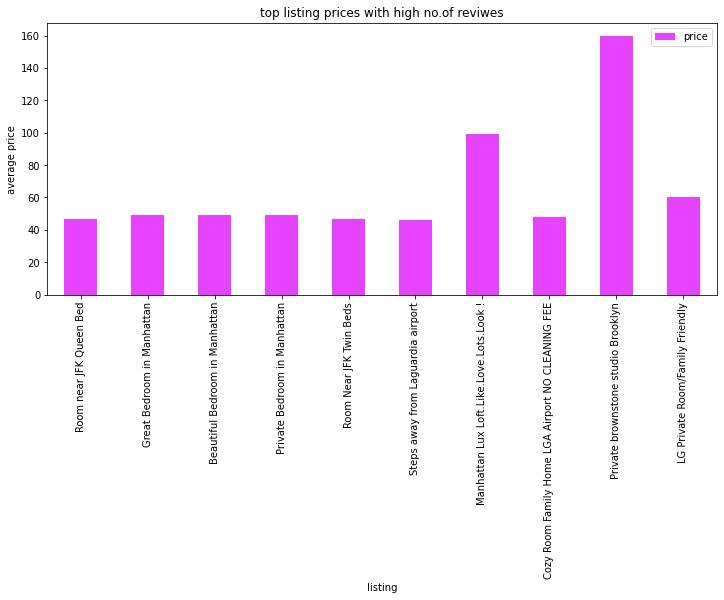

In [61]:
# plotting listings with top reviews vs average price 
top_reviews_price.plot(kind='bar',x='name',y='price',color = '#E543FF',figsize = (12,5) )
plt.xlabel('listing')
plt.ylabel('average price')
plt.title('top listing prices with high no.of reviwes')

In [62]:
# calculating the price of the listing with highest number of reviews
print(f"The price of listing with highest no.of ratings is: {top_reviews_price.loc[0,'price']} located in {top_reviews_price.loc[0,'neighbourhood_group']}")

The price of listing with highest no.of ratings is: 47.0 located in Queens


### ***6)based on number of days avaiable:***

In [63]:
# average price of the listing with respect to the availability of the listing throughout the year 
availability_price = airbnb_nyc_df.groupby(['availability_365'])['price'].mean()
availability_price

availability_365
0      128.002738
1      129.276961
2      143.166667
3      136.486928
4      134.729614
          ...    
361    134.144144
362    162.120482
363    168.753138
364    191.173116
365    183.969112
Name: price, Length: 366, dtype: float64

Text(0.5, 1.0, 'price based on availability')

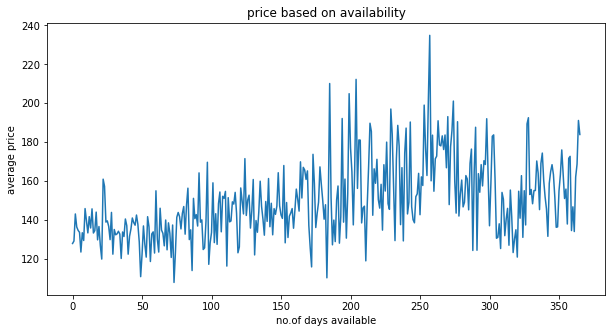

In [64]:
# plotting avaiability of the listing vs average price 
plt.figure(figsize=(10,5))
sns.lineplot(data=availability_price)
plt.xlabel('no.of days available')
plt.ylabel('average price')
plt.title('price based on availability')

In [65]:
# identifying the top 10 listing with high availability
top_10_available_listing=airbnb_nyc_df.nlargest(10,'availability_365')
top_10_available_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.00,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,0.11,365


In [66]:
# calculating the average price of the listing with highest availability
print(f"the average price of lisiting with high number of days available is: {top_10_available_listing['price'].mean()} is located in {top_10_available_listing['neighbourhood_group']}")

the average price of lisiting with high number of days available is: 150.3 is located in 0       Brooklyn
2      Manhattan
36      Brooklyn
38      Brooklyn
97     Manhattan
139     Brooklyn
164    Manhattan
181       Queens
196       Queens
200       Queens
Name: neighbourhood_group, dtype: object


### ***7) Based on location:***

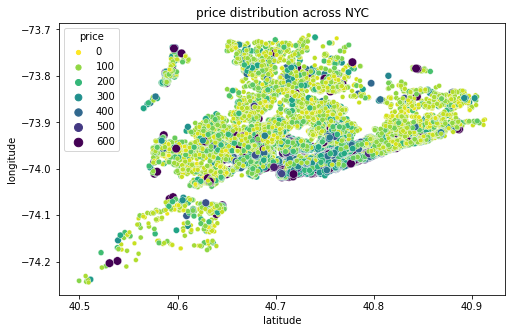

In [67]:
# plotting the location based on latitude and longitude and the price at that particular location
plt.figure(figsize=(8,5))
sns.scatterplot(x='latitude',y='longitude',hue='price',size='price',data = airbnb_nyc_df,palette='viridis_r')
plt.title('price distribution across NYC')
plt.show()

***Inference:***
- Average price of the listings in Manhattan is high when compared to other neighbourhood groups.
- Average price of the Entire/Apt room type is very high compared to other room types across NYC.
- As there is a correlation between minimum number of nights and price, it is a positive correlation. So as the minimum_nights is increasing the average price of the listing is also increasing.
- Room near JFK Queen bed is the listing with highest number of reviews which is located in queens and it has a price of $47. 
- We can say that although queens do not have as many listings as Manhattan/ Brooklyn it has high number of reviews because of its pricing. But the top 10 listings with high number of reviews have more listings present in manhattan.
- From the number of days available vs price graph we can say that the price is low when the number of days is less than a saturation point(let's say 150) and it is higher when the number of days available are more. It is not always true because there are many other parameters which effect the pricing of the listing. 

##**Number of reviews:**

### ***1) Top 10 reviewed hosts:***

In [68]:
# identifying the hosts with high number of reviews
tr_host=  airbnb_nyc_df.groupby(['host_id','host_name','neighbourhood_group'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()[:10]
tr_host

,host_id,host_name,neighbourhood_group,number_of_reviews
0,47621202,Dona,Queens,629
1,4734398,Jj,Manhattan,607
2,37312959,Maya,Queens,543
3,2369681,Carol,Manhattan,540
4,26432133,Danielle,Queens,510
5,12949460,Asa,Brooklyn,488
6,792159,Wanda,Brooklyn,480
7,2680820,Linda,Queens,474
8,42273,Dani,Brooklyn,467
9,23591164,Angela,Queens,466


Text(0.5, 1.0, 'top 10 reviewed hosts')

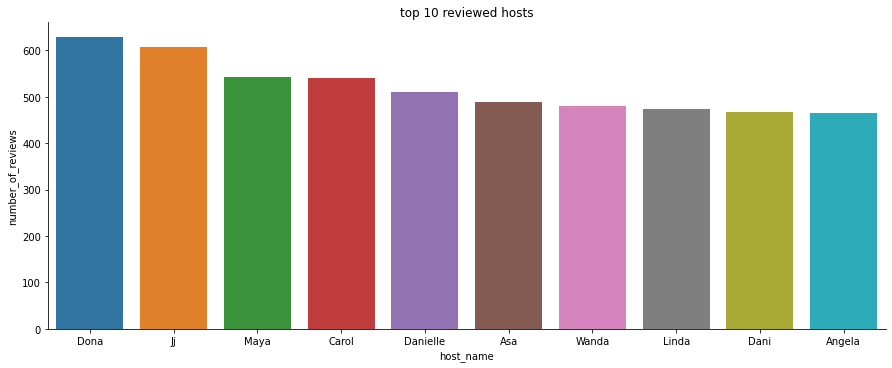

In [69]:
# plotting the hosts name vs number of reviews 
sns.catplot(kind='bar',x='host_name',y='number_of_reviews',data=tr_host,height =5,aspect =2.5)
plt.title('top 10 reviewed hosts')

In [70]:
print(f"the host with highest number of reviews is '{tr_host.loc[0,'host_name']}' and hosts in '{tr_host.loc[0,'neighbourhood_group']}'")

the host with highest number of reviews is 'Dona' and hosts in 'Queens'


### ***2) Reviews of room types in different neighbourhood groups:***

In [71]:
# maximum number of reviews of different room types in particular neighbourhood groups
tr_nbh_group= airbnb_nyc_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
tr_nbh_group

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,271
1,Bronx,Private room,321
2,Bronx,Shared room,116
3,Brooklyn,Entire home/apt,488
4,Brooklyn,Private room,480
5,Brooklyn,Shared room,236
6,Manhattan,Entire home/apt,447
7,Manhattan,Private room,607
8,Manhattan,Shared room,229
9,Queens,Entire home/apt,441


Text(0.5, 1.0, 'total reviews of room types in neighbourhood groups')

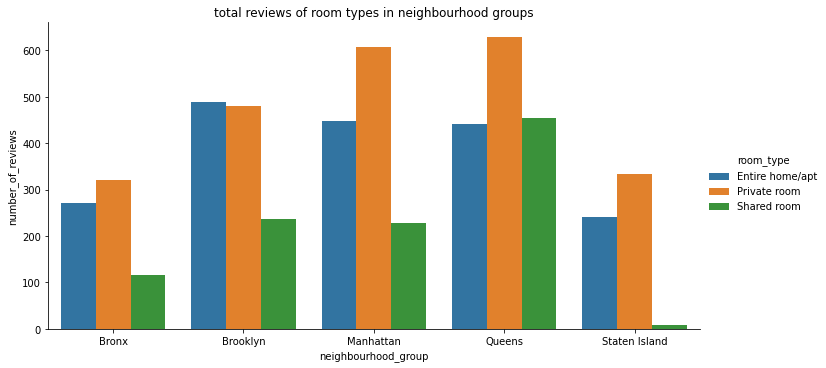

In [72]:
# plotting the maximum number of reviews of room types in particular neighbourhood group
sns.catplot(kind='bar',x='neighbourhood_group',y='number_of_reviews',hue = 'room_type',data = tr_nbh_group,height=5,aspect=2)
plt.title('total reviews of room types in neighbourhood groups')

***Inference:***
- Hosts with high number of reviews are mainly from Queens. And the host with highest number of reviews is Dona from queens.
- Private room types have highest number of reviews in all the neighbourhood groups except Brooklyn and the shared room have lowest number of reviews except in Queens. And Queens has the highest number of reviews for shared rooms when ompared to other neighbourhood group.

##**Availability365:**

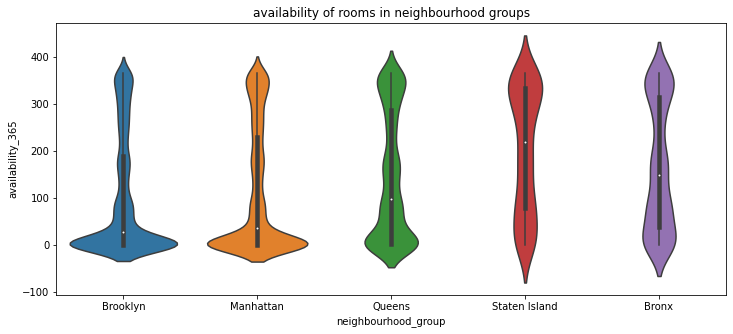

In [73]:
# plotting the distribution of availability of the listings in particular neighbourhood groups 
plt.figure(figsize=(12,5))
sns.violinplot(data=airbnb_nyc_df,y='availability_365',x='neighbourhood_group')
plt.title('availability of rooms in neighbourhood groups')
plt.show()

***Inference:***
- Although manhattan and brooklyn are having high number of listings when compared to other neighbourhood groups, the median of number of days available is less compared to others. Where as Staten Island has high median of number of days available as there are very few listings present there.

##**Latitude and Longitude:**

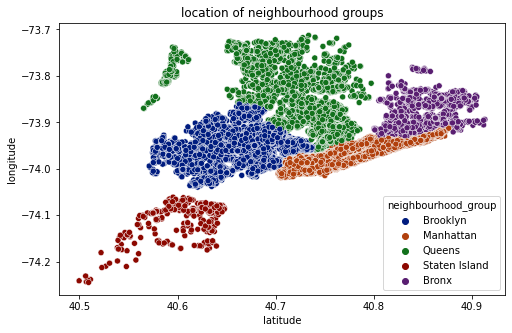

In [74]:
# plotting locations of listings across NYC
plt.figure(figsize=(8,5))
sns.scatterplot(x='latitude',y='longitude',hue='neighbourhood_group',data = airbnb_nyc_df,palette='dark')
plt.title('location of neighbourhood groups')
plt.show()

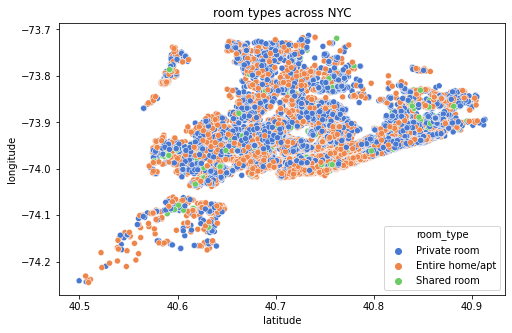

In [75]:
# plotting different room types at different locations of NYC
plt.figure(figsize=(8,5))
sns.scatterplot(x='latitude',y='longitude',hue='room_type',data = airbnb_nyc_df,palette = 'muted')
plt.title('room types across NYC')
plt.show()

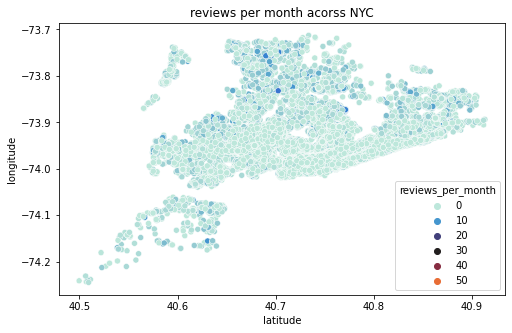

In [76]:
# plotting reviews per month of different listings present in different locations of NYC
plt.figure(figsize=(8,5))
sns.scatterplot(x='latitude',y='longitude',hue='reviews_per_month',data = airbnb_nyc_df,palette= 'icefire')
plt.title('reviews per month acorss NYC')
plt.show()

###**Conclusion:**
1) From all the neighbourhood groups it can be observed that Manhattan and Brookyln have the highest number of listings.

2) Entire home/apartment is the room type that is most in demand across NY.

3) Manhattan is a well-known location where businesses may choose to invest in entire homes or apartments.

4) Within neighbourhood, williamsburg has the highest number of listings and it is located in brookyln.

5) Among the hosts,Michael is the busiest host as he have more number of private room types even compared to sonder(NYC) with high number of entire/apt room type.

6) Manhattan is the place with highest price compared to other neighbourhood groups.

7) Entire home/apt room type is seen to have higher price than the other two room types.

8) Price and Minimum number of nights have a postive correlation i.e., as minimum number of nights is high then the price is high.

9) Queens has the highest number of reviews and one of its reasons maybe its price.

10) Staten Island has high median of number of days available as there are very few listings present there.